In [46]:
valid_codes = '''AUS,AUT,BEL,BGR,HRV,CHL,CZE,DNK,GBR,EST,FIN,FRA,DEU,GRC,HUN,ISL,ISR,ITA,LVA,LTU,LUX,NLD,NZL,NOR,POL,PRT,KOR,SVN,SVK,ESP,CHE,SWE,USA'''.split(",")

In [47]:
#these are the countries we have ex_mort data for from country codes text file
#thank you Alex
print(valid_codes)

['AUS', 'AUT', 'BEL', 'BGR', 'HRV', 'CHL', 'CZE', 'DNK', 'GBR', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 'ITA', 'LVA', 'LTU', 'LUX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'KOR', 'SVN', 'SVK', 'ESP', 'CHE', 'SWE', 'USA']


In [48]:
import pandas as pd
import numpy as np
ex_mort = pd.read_csv("clean_combined.csv")
safety = pd.read_csv("covid-stringency-index.csv")
#only use countries that we have ex_mort data for
safety = safety[safety["Code"].isin(valid_codes)]
#only use weeks from the pandemic
ex_mort = ex_mort[ex_mort["years_relative"] >=0]


#convert to datetime to grab week number and year
safety["Day"] =  pd.to_datetime(safety["Day"])

In [49]:
safety["week"] = safety["Day"].dt.week
safety['year'] = safety["Day"].dt.year

In [50]:
si_df = safety.groupby(["Code", "week", "year"])["stringency_index"].mean().reset_index()
si_df = si_df.rename(columns={"Code": "country"})
si_df.head(10)

,country,week,year,stringency_index
0,AUS,1,2021,70.830000
1,AUS,1,2022,43.451429
2,AUS,2,2021,55.090000
3,AUS,2,2022,44.244286
4,AUS,3,2021,55.090000
5,AUS,3,2022,64.221429
6,AUS,4,2020,1.853333
7,AUS,4,2021,57.338571
8,AUS,4,2022,64.680000
9,AUS,5,2020,7.940000


In [51]:
#put the stringency index averages per week into the rest of the data
df = pd.merge(ex_mort, si_df)
df.head(10)

,country,week,year,DTotal,date,mov_avg,years_relative,pred_deaths,excess_mortality,em_per_capita,...,new_cases,total_deaths,new_deaths,total_cases_per_million,hosp_patients,population,mov_avg_cases,new_cases_per_capita,normalized_cases,stringency_index
0,DEU,4,2020,18827.0,2020-01-26,18919.714286,0,18850.715602,68.998684,8.223873e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.780000
1,SVK,4,2020,1107.0,2020-01-26,1077.142857,0,1103.675940,-26.533083,-4.869108e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,AUS,4,2020,2619.0,2020-01-26,2540.714286,0,2594.485714,-53.771429,-2.085116e-06,...,4.0,NaN,0.0,0.155,NaN,25788217.0,4.0,1.551096e-07,4.817996e-06,1.853333
3,LTU,4,2020,786.0,2020-01-26,768.857143,0,854.681767,-85.824624,-3.190670e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,AUT,4,2020,1779.0,2020-01-26,1683.714286,0,1686.033083,-2.318797,-2.564170e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
5,USA,4,2020,59153.0,2020-01-26,59056.714286,0,59481.128571,-424.414286,-1.274843e-06,...,4.0,NaN,0.0,0.003,NaN,332915074.0,4.0,1.201508e-08,3.732109e-07,0.000000
6,FRA,4,2020,12331.0,2020-01-26,12513.714286,0,12619.699060,-105.984774,-1.571961e-06,...,3.0,NaN,0.0,0.030,NaN,67422000.0,3.0,4.449586e-08,1.382125e-06,3.706667
7,SVN,4,2020,455.0,2020-01-26,429.714286,0,420.842105,8.872180,4.268092e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
8,POL,4,2020,8015.0,2020-01-26,8118.285714,0,8320.867105,-202.581391,-5.359721e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.706667
9,EST,4,2020,299.0,2020-01-26,305.428571,0,294.446241,10.982331,8.287376e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [52]:
#loading vaccination data, converting date to week/year
owidVac = pd.read_csv("vaccinations.csv")
owidVac = owidVac[owidVac["iso_code"].isin(valid_codes)]

owidVac["date"] = pd.to_datetime(owidVac["date"])
owidVac["week"] = owidVac["date"].dt.week
owidVac['year'] = owidVac["date"].dt.year

In [53]:
#sort vaccination data, prepare for merge
vc = owidVac.groupby(["iso_code", "week", "year", "people_vaccinated", "people_fully_vaccinated"])["total_vaccinations"].max().reset_index()
vc = vc.rename(columns={"iso_code": "country"})
vc.head(10)

,country,week,year,people_vaccinated,people_fully_vaccinated,total_vaccinations
0,AUS,1,2022,20463839.0,19782523.0,42812691.0
1,AUS,1,2022,20475452.0,19806589.0,43024593.0
2,AUS,1,2022,20488662.0,19832376.0,43286155.0
3,AUS,1,2022,20503096.0,19857649.0,43558448.0
4,AUS,1,2022,20516623.0,19882365.0,43823668.0
5,AUS,1,2022,20524868.0,19896355.0,43987111.0
6,AUS,1,2022,20529932.0,19904821.0,44086608.0
7,AUS,2,2022,20578901.0,19928352.0,44374463.0
8,AUS,2,2022,20644440.0,19946441.0,44700720.0
9,AUS,2,2022,20714403.0,19967401.0,45045755.0


In [54]:
#merge vaccination data into dataset
df = pd.merge(df, vc)

df["percent_vaccinated"] = df["people_fully_vaccinated"]/df['population']*100
print(df["percent_vaccinated"].isna().sum())
#drop 133 na in percent vacc
df = df.dropna(subset = ['percent_vaccinated'])
print(df["percent_vaccinated"].isna().sum())
df.head(10)

df[df["country"] == "USA"]

0
0


,country,week,year,DTotal,date,mov_avg,years_relative,pred_deaths,excess_mortality,em_per_capita,...,hosp_patients,population,mov_avg_cases,new_cases_per_capita,normalized_cases,stringency_index,people_vaccinated,people_fully_vaccinated,total_vaccinations,percent_vaccinated
0,USA,50,2020,81952.0,2020-12-13,71991.142857,0,57378.114286,14613.028571,0.000044,...,101027.0,332915074.0,1.108287e+06,0.003329,0.103406,71.76,26321.0,6449.0,31762.0,0.001937
3,USA,51,2020,82864.0,2020-12-20,74772.857143,0,57984.942857,16787.914286,0.000050,...,109689.0,332915074.0,1.246826e+06,0.003745,0.116332,71.76,30754.0,6575.0,36356.0,0.001975
4,USA,51,2020,82864.0,2020-12-20,74772.857143,0,57984.942857,16787.914286,0.000050,...,109689.0,332915074.0,1.246826e+06,0.003745,0.116332,71.76,76563.0,6839.0,84328.0,0.002054
5,USA,51,2020,82864.0,2020-12-20,74772.857143,0,57984.942857,16787.914286,0.000050,...,109689.0,332915074.0,1.246826e+06,0.003745,0.116332,71.76,230719.0,7292.0,243701.0,0.002190
6,USA,51,2020,82864.0,2020-12-20,74772.857143,0,57984.942857,16787.914286,0.000050,...,109689.0,332915074.0,1.246826e+06,0.003745,0.116332,71.76,496429.0,8049.0,516306.0,0.002418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,USA,52,2021,67512.0,2022-01-02,66799.285714,2,61094.818182,5704.467532,0.000017,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,242682298.0,208110373.0,512362989.0,62.511550
8784,USA,52,2021,67512.0,2022-01-02,66799.285714,2,61094.818182,5704.467532,0.000017,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,243117501.0,208351642.0,514037936.0,62.584022
8785,USA,52,2021,67512.0,2022-01-02,66799.285714,2,61094.818182,5704.467532,0.000017,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,243553688.0,208588393.0,515695587.0,62.655136
8786,USA,52,2021,67512.0,2022-01-02,66799.285714,2,61094.818182,5704.467532,0.000017,...,74692.0,332915074.0,1.164741e+06,0.003499,0.108673,53.24,243956725.0,208802687.0,517209719.0,62.719505


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


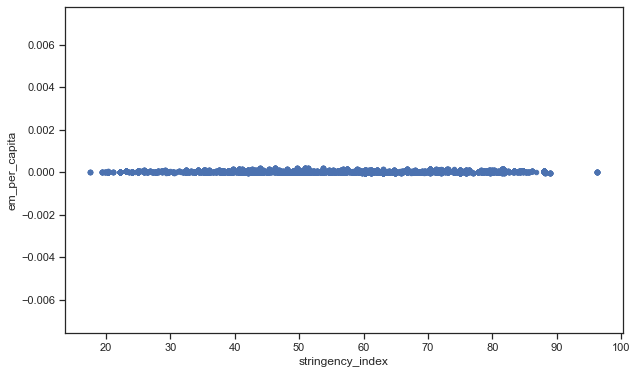

In [55]:
#visualizations to find cool patterns
import seaborn
import matplotlib.pyplot as plt
df.plot.scatter("stringency_index", "em_per_capita")


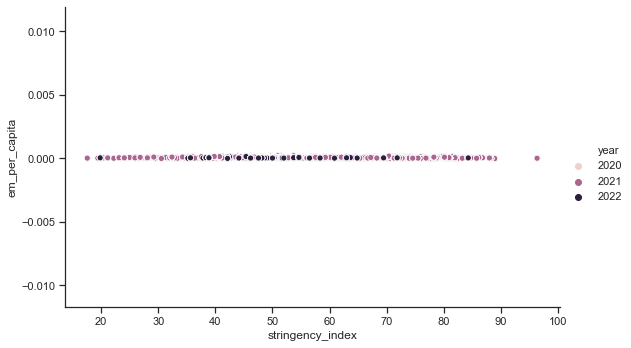

In [56]:
#using year to see patterns with seaborn
seaborn.set(style='ticks')
seaborn.relplot(data=df, x='stringency_index', y='em_per_capita', hue='year',  aspect=1.61)
plt.show()

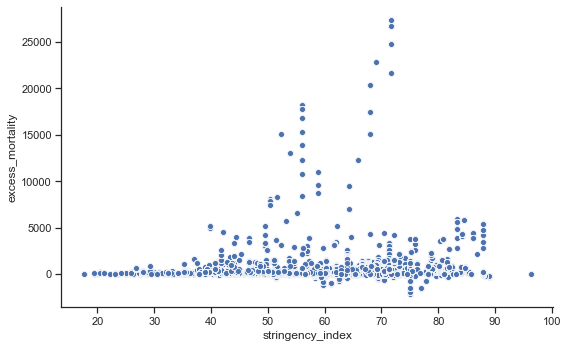

In [57]:
#isolating a year
year2 = df[df["year"] == 2021]
seaborn.relplot(data=year2, x='stringency_index', y='excess_mortality', aspect=1.61)
plt.show()

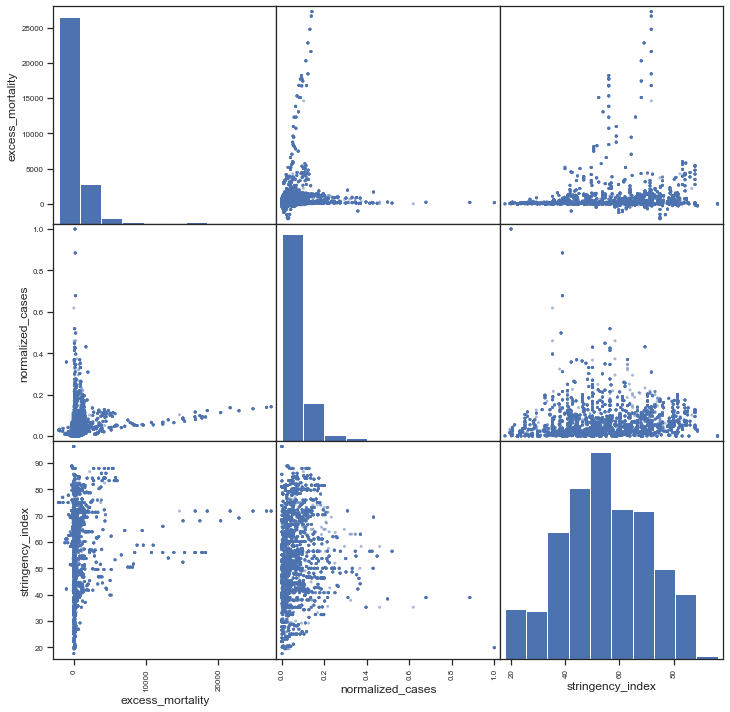

In [58]:
#scatterplot matrix to see more patterns
pd.plotting.scatter_matrix(df[["excess_mortality", "normalized_cases", "stringency_index"]], figsize=(12, 12))
plt.show()

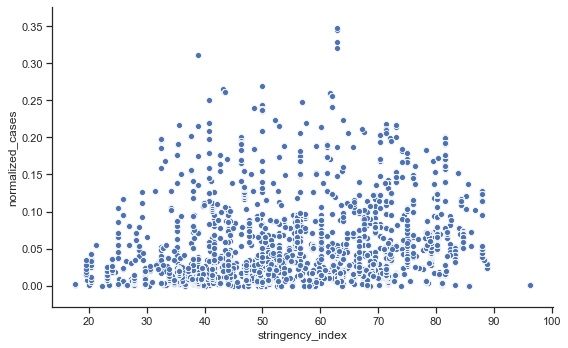

In [59]:
#isolating a viz
seaborn.relplot(data=year2, x='stringency_index', y='normalized_cases', aspect=1.61)
plt.show()

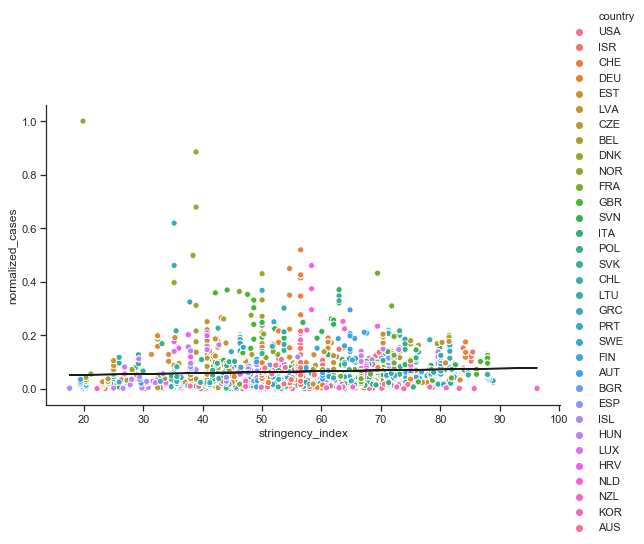

In [60]:
#regression on all data
from sklearn import linear_model
df = df[df['normalized_cases'].notna()]
reg = linear_model.LinearRegression()
testx = df[["stringency_index"]]
testy = df["normalized_cases"]
colors = df["country"]
reg.fit(testx, testy)
reg.score(testx, testy)
y_pred = reg.predict(testx)
seaborn.relplot(data=df, x='stringency_index', y='normalized_cases', hue='country',  aspect=1.61)
plt.plot(testx, y_pred, color ='k')
  
plt.show()

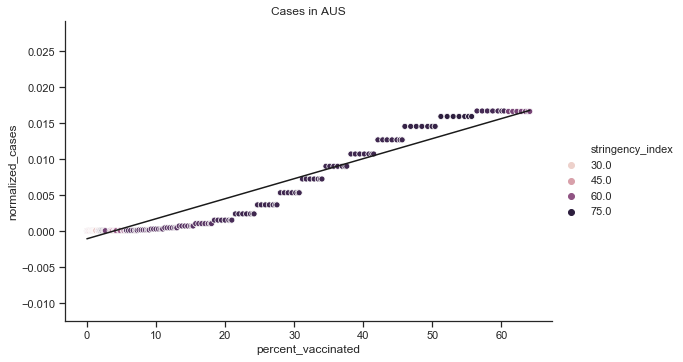

Score 0.9297245505235759


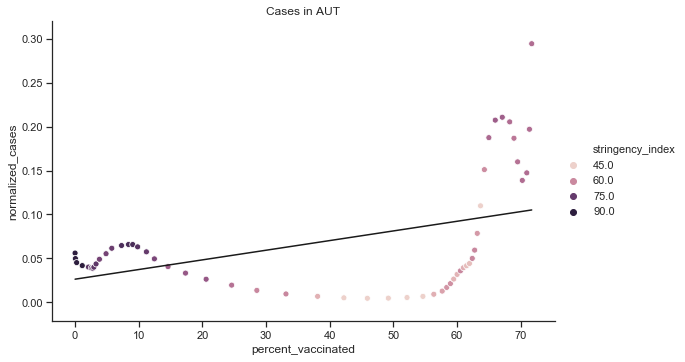

Score 0.19687001739103327


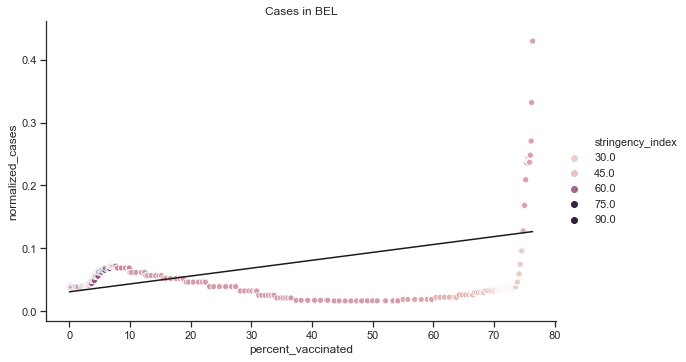

Score 0.1969232075713361


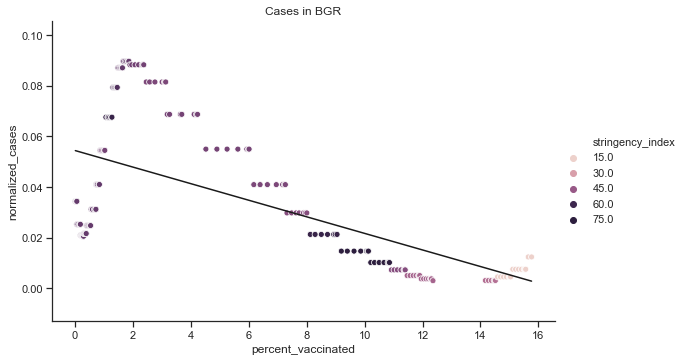

Score 0.3627997316298728


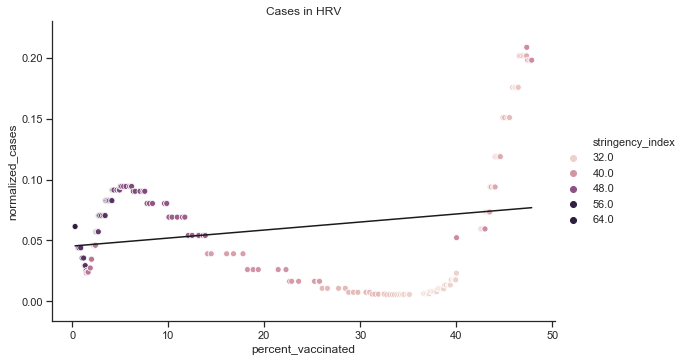

Score 0.04238271229473933


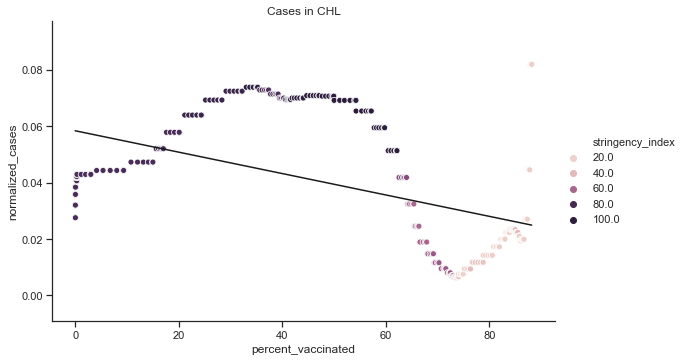

Score 0.22794841719349357


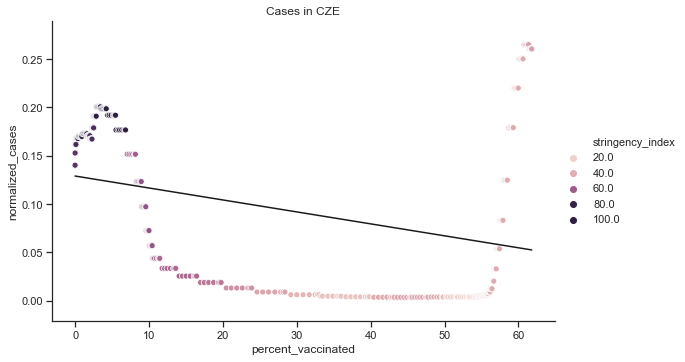

Score 0.11960140970517563


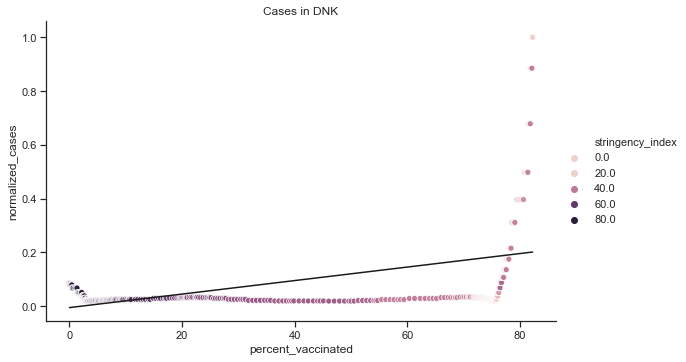

Score 0.16205402146464132


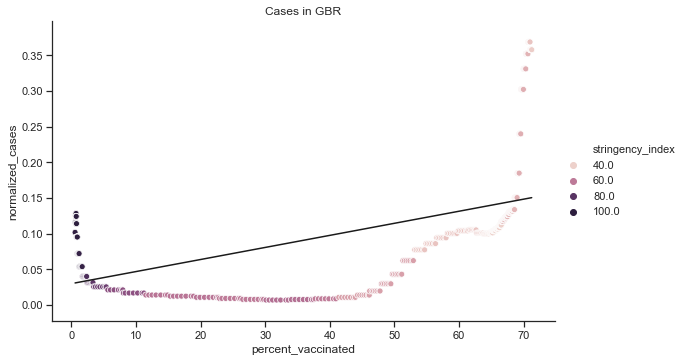

Score 0.2508951693678858


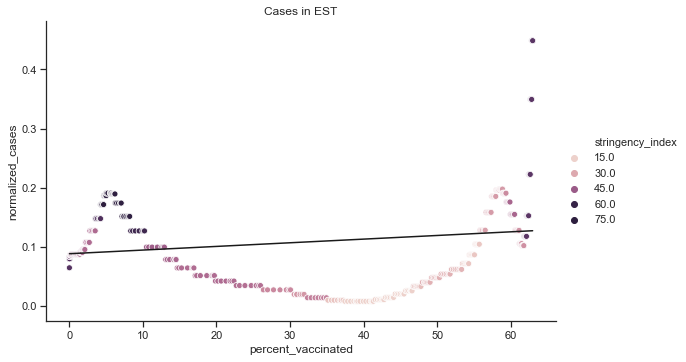

Score 0.03134785203529489


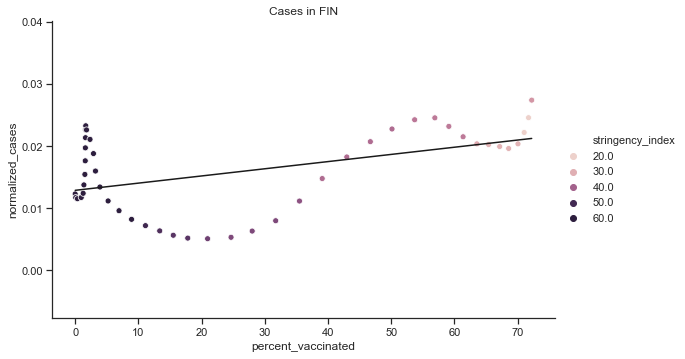

Score 0.2290067320046414


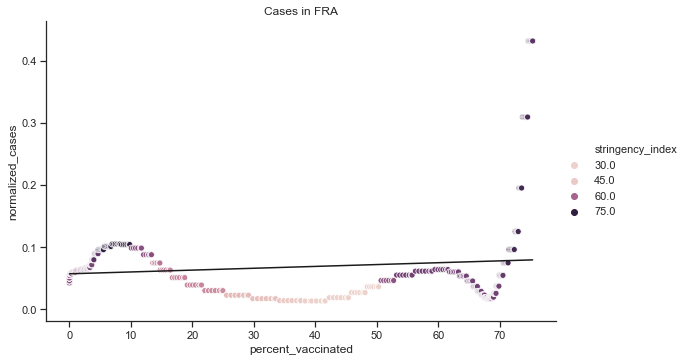

Score 0.015554838142596727


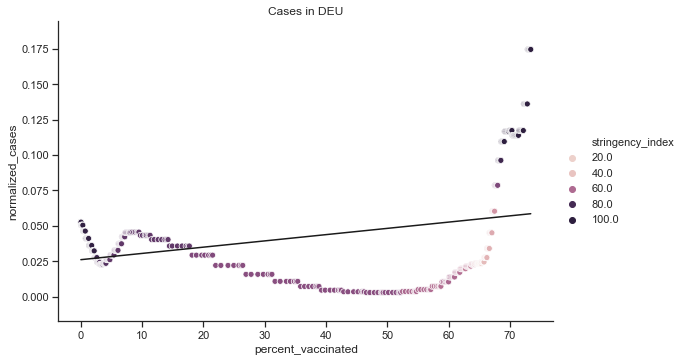

Score 0.10655007265856076


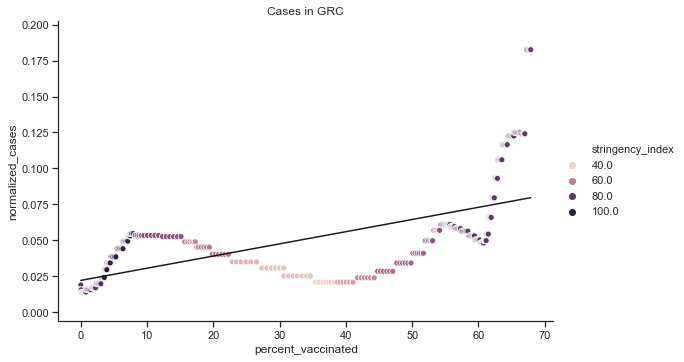

Score 0.4001535549403391


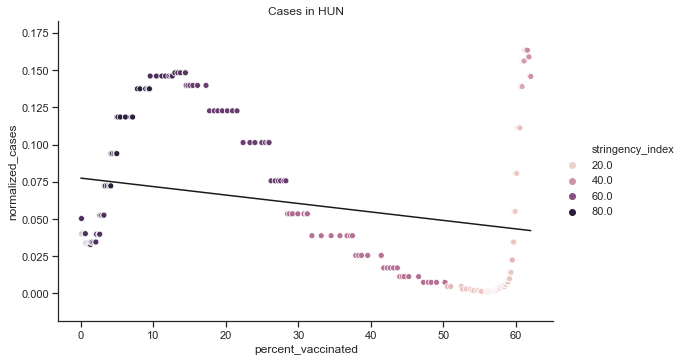

Score 0.06829945239163915


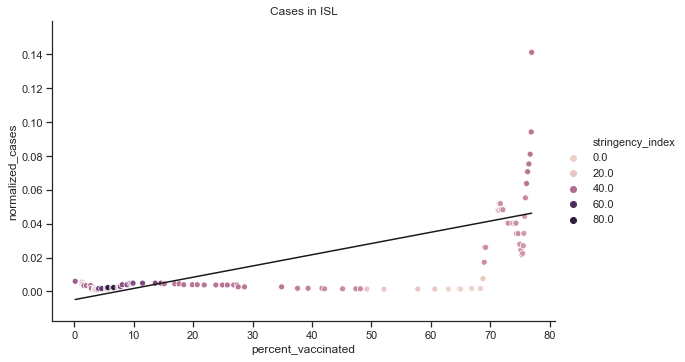

Score 0.5041812259451218


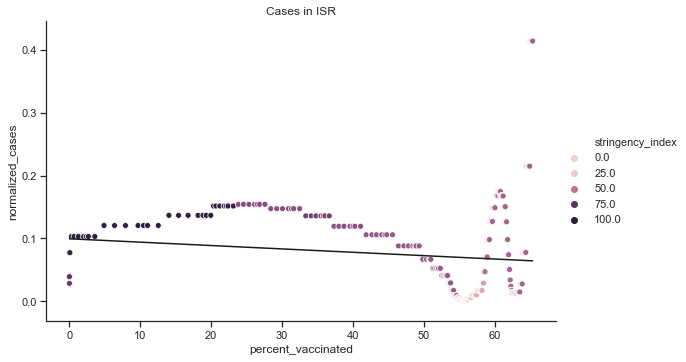

Score 0.015323601463152037


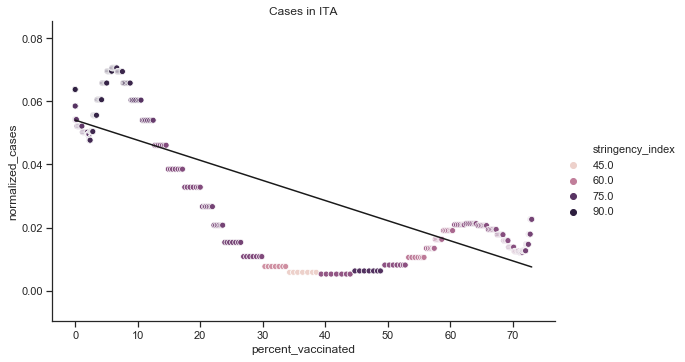

Score 0.6752273848956196


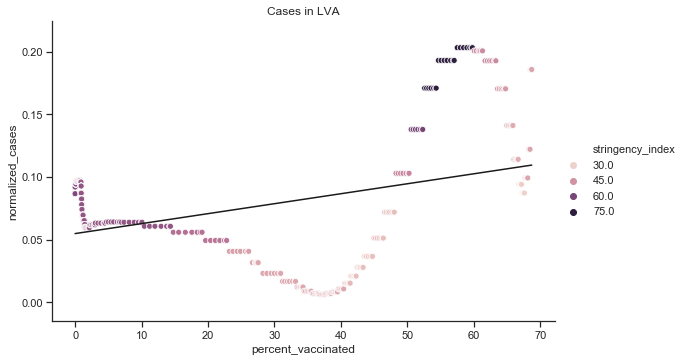

Score 0.13321377761222197


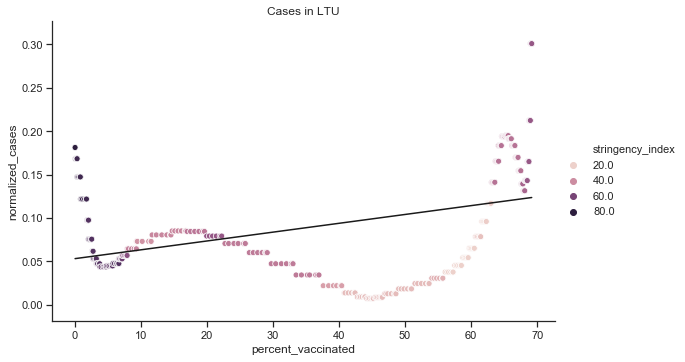

Score 0.16202800291907138


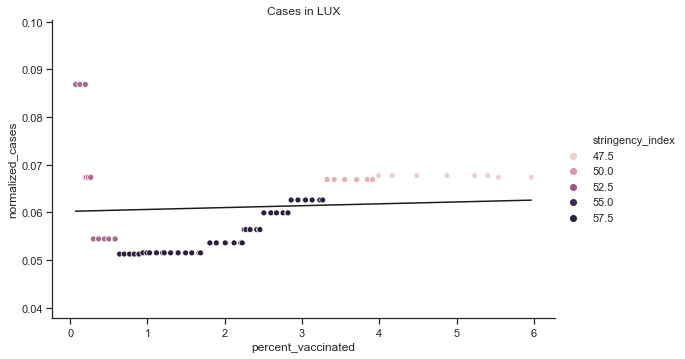

Score 0.0036420524182265712


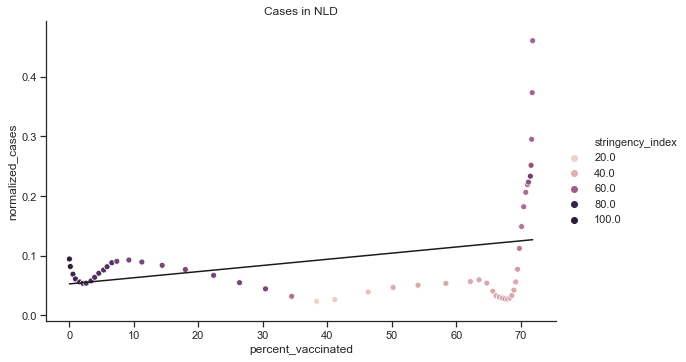

Score 0.1084926923962436


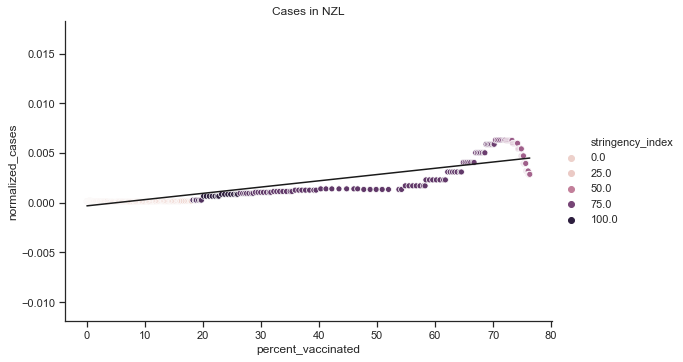

Score 0.8172611790866253


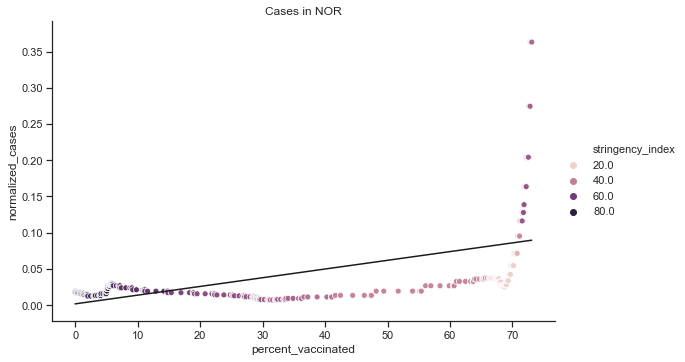

Score 0.2663074267198926


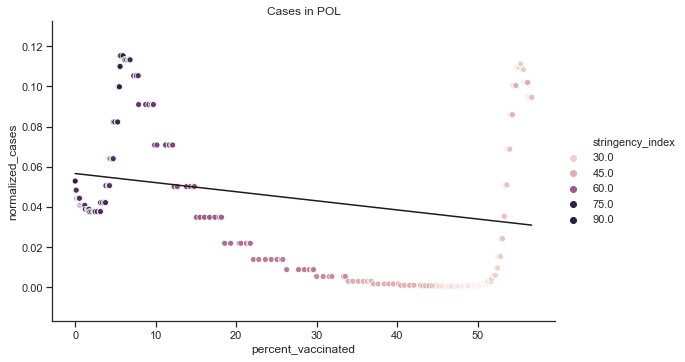

Score 0.06131838555258895


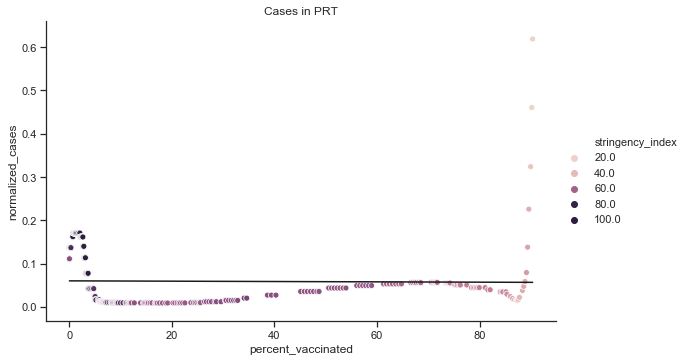

Score 0.00028709700249407444


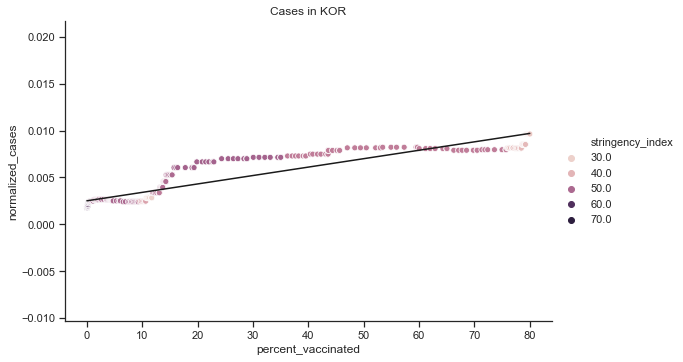

Score 0.8624693848796439


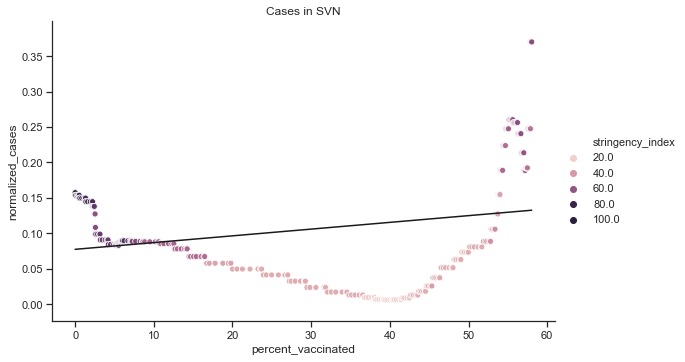

Score 0.06248919721477564


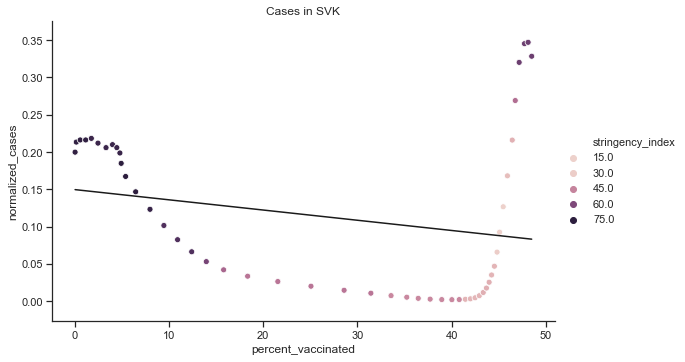

Score 0.05361914045188332


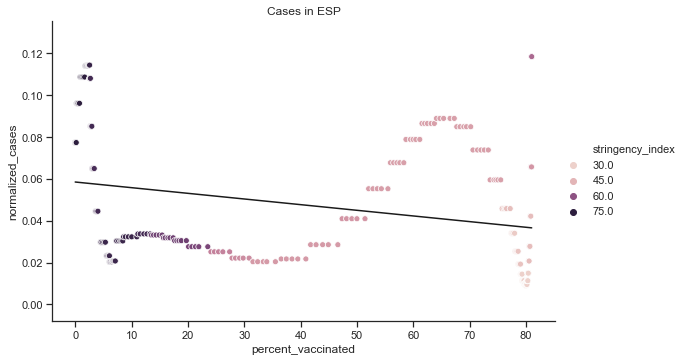

Score 0.07397503862443022


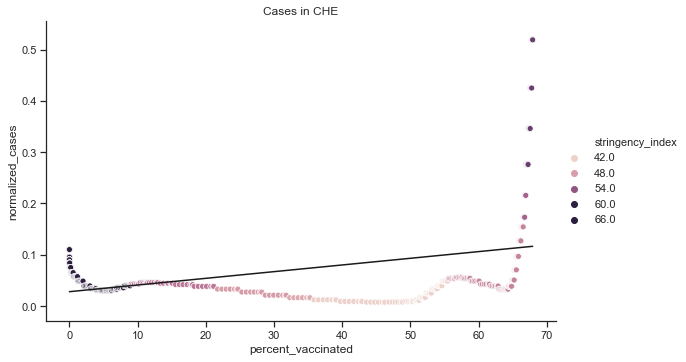

Score 0.1197753146297863


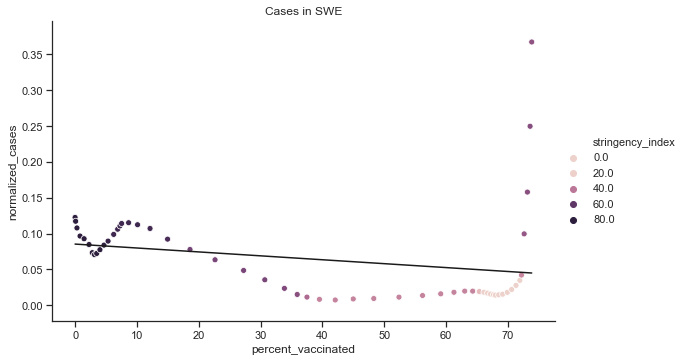

Score 0.057870439275691576


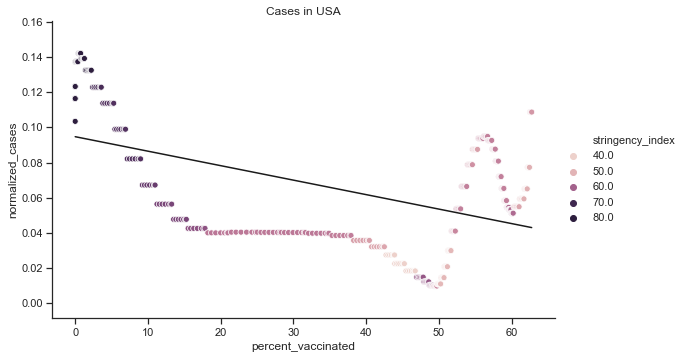

Score 0.2374029389841419
21 Positively Correlated: ['AUS', 'AUT', 'BEL', 'HRV', 'DNK', 'GBR', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'ISL', 'LVA', 'LTU', 'LUX', 'NLD', 'NZL', 'NOR', 'KOR', 'SVN', 'CHE']
12 Negatively Correlated: ['BGR', 'CHL', 'CZE', 'HUN', 'ISR', 'ITA', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'USA']


In [64]:
#regression on single countries

posCountry = []
negCountry = []
for c in valid_codes:
    dfUSA = df[df["country"] == c]
    testx = dfUSA[["percent_vaccinated"]]
    testy = dfUSA["normalized_cases"]

    reg.fit(testx, testy)
    
    y_pred = reg.predict(testx)
    seaborn.relplot(data=dfUSA, x='percent_vaccinated', y='normalized_cases', hue='stringency_index',  aspect=1.61)

    plt.plot(testx, y_pred, color ='k')
    plt.title("Cases in {}".format(c))
    plt.xlabel("percent_vaccinated")
    plt.ylabel("normalized_cases")

    plt.show()
    print("Score",reg.score(testx, testy))
    if reg.coef_ > 0:
        posCountry.append(c)
    else:
        negCountry.append(c)
        
print("{} Positively Correlated: {}".format(len(posCountry), posCountry))
print("{} Negatively Correlated: {}".format(len(negCountry), negCountry))

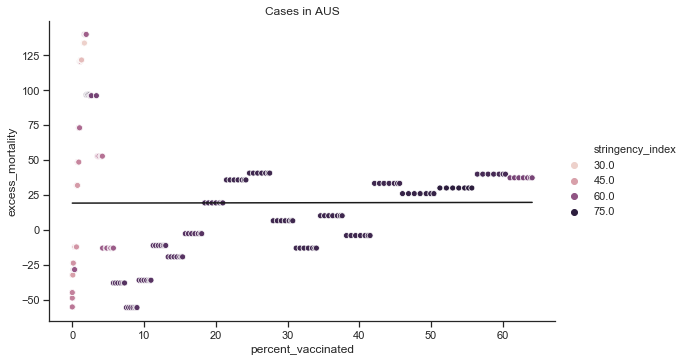

Score 8.490261208304872e-06


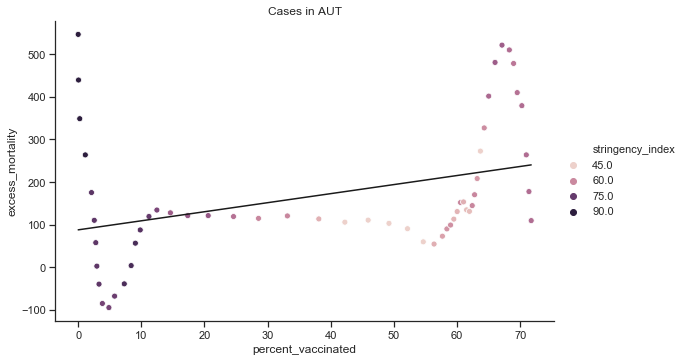

Score 0.13237790936287985


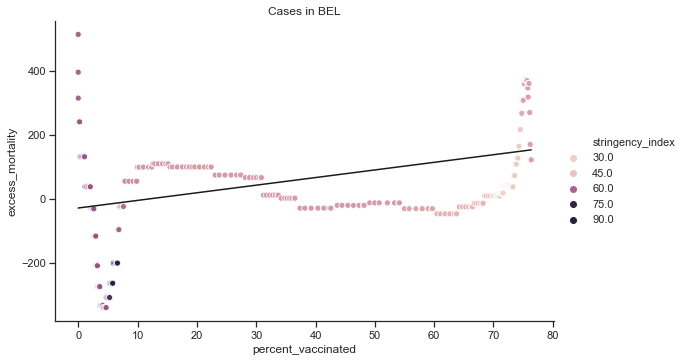

Score 0.1514655218138199


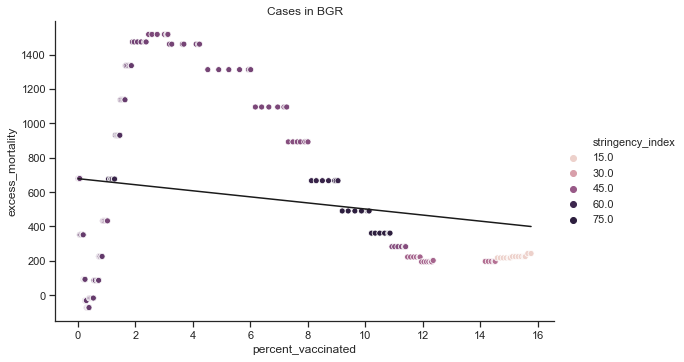

Score 0.03457062240020081


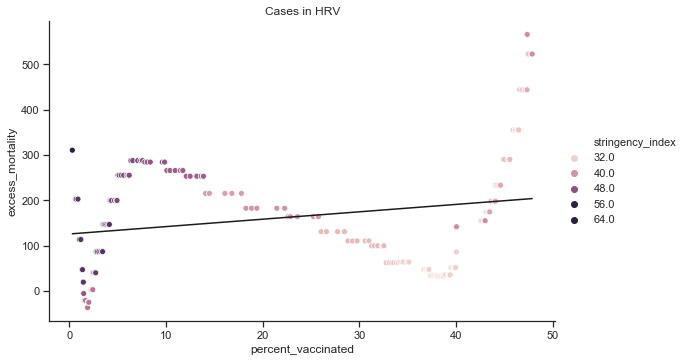

Score 0.04856779124975297


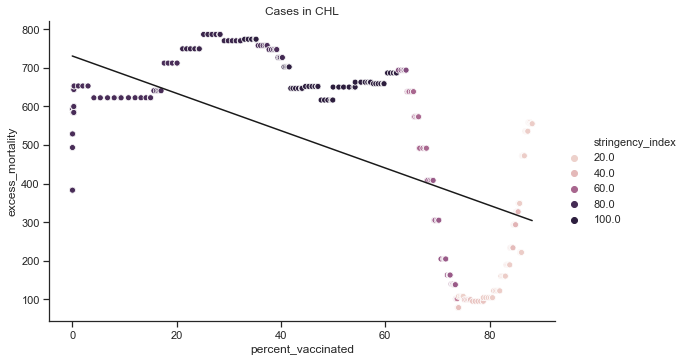

Score 0.37709374518612027


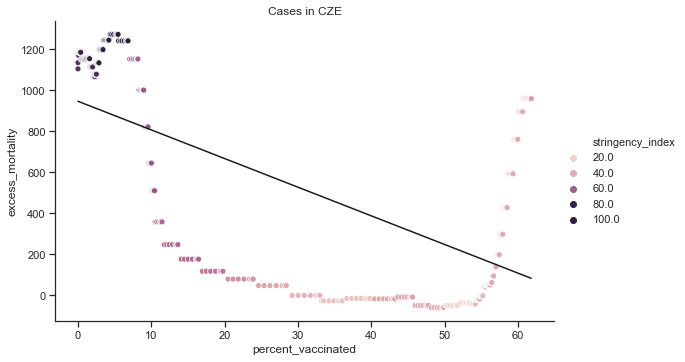

Score 0.44047288132738865


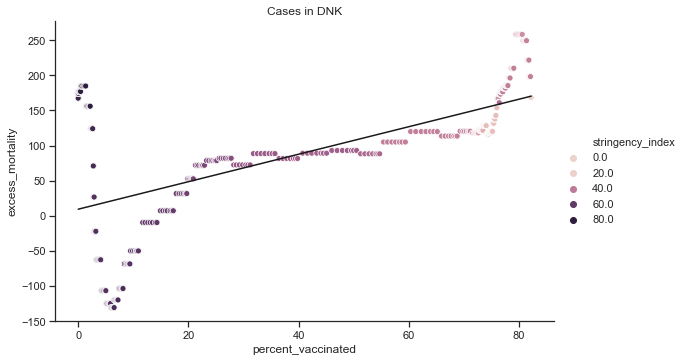

Score 0.4240503250102411


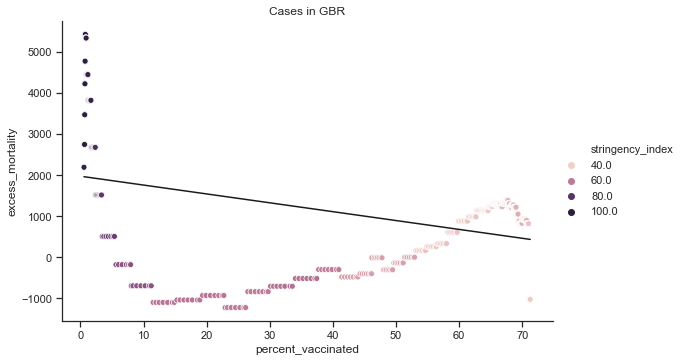

Score 0.12964575381361887


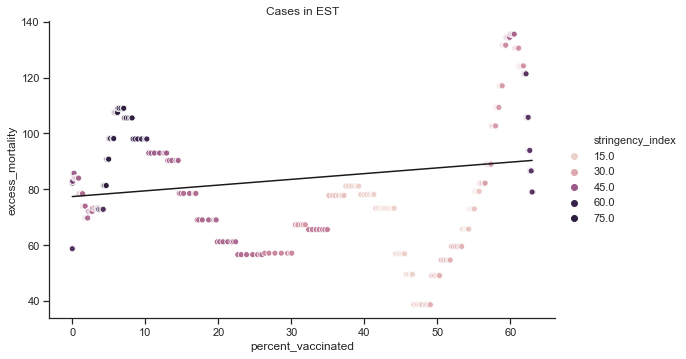

Score 0.04209529171207638


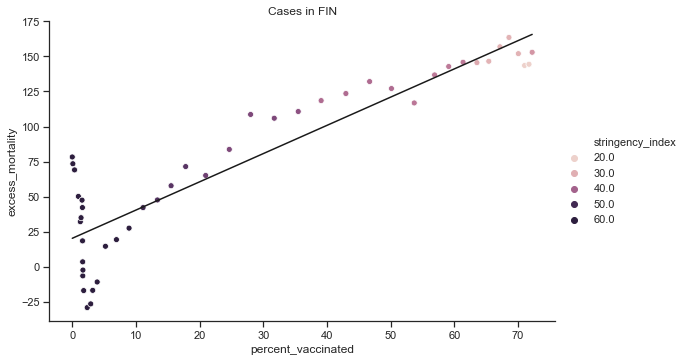

Score 0.8206054848891492


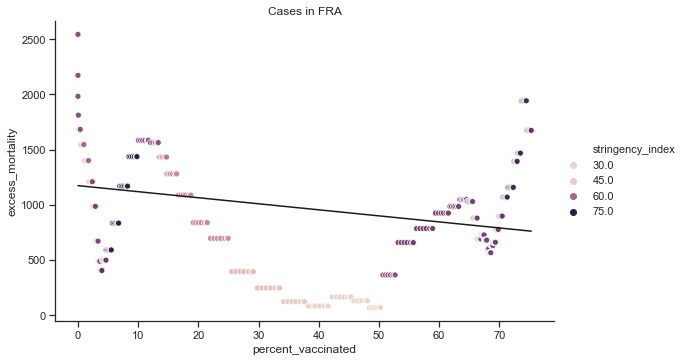

Score 0.07870779035305975


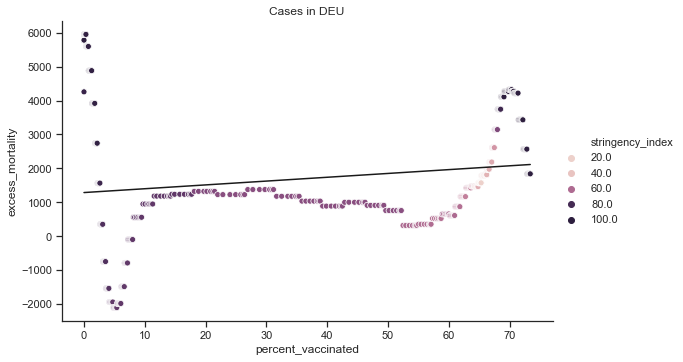

Score 0.025745005918788366


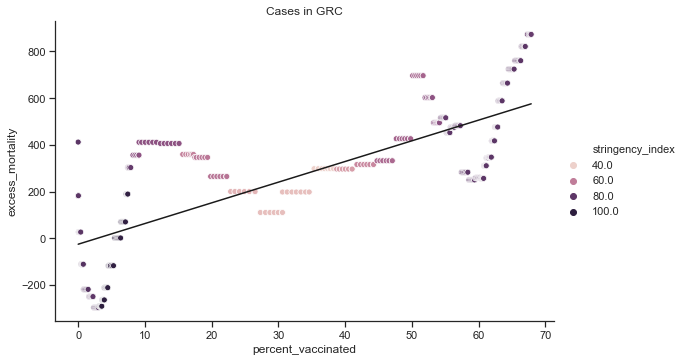

Score 0.5896180246054425


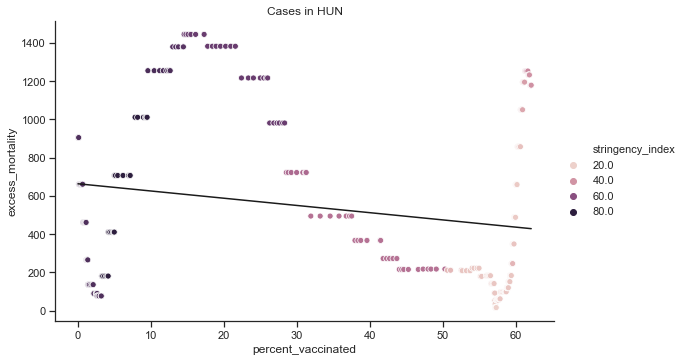

Score 0.04126532271979721


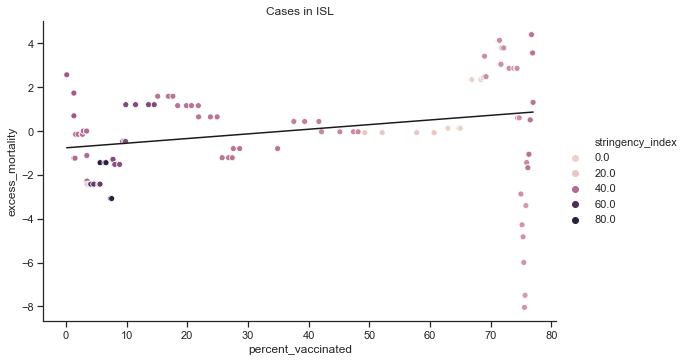

Score 0.07951875335327718


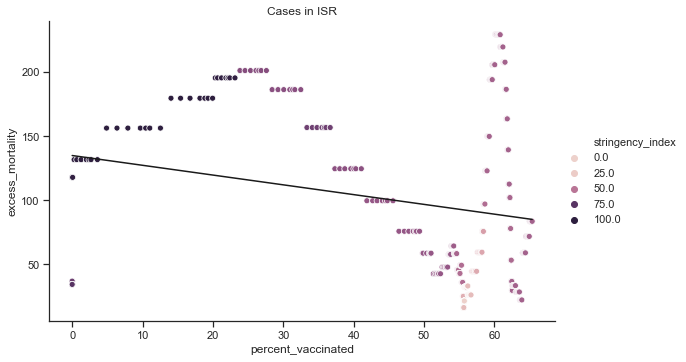

Score 0.04094106370060657


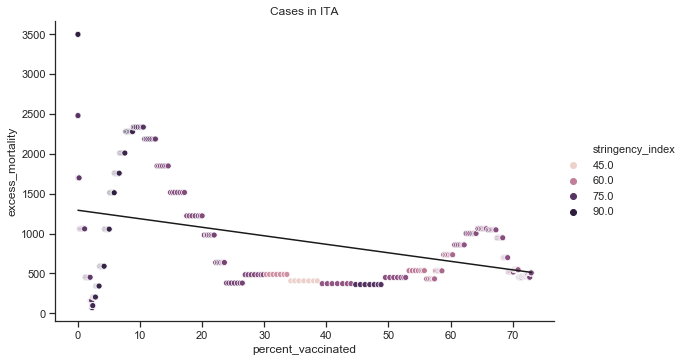

Score 0.16139785947041085


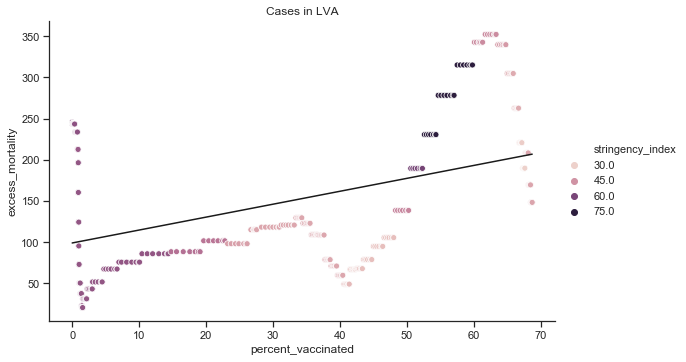

Score 0.18554434058502778


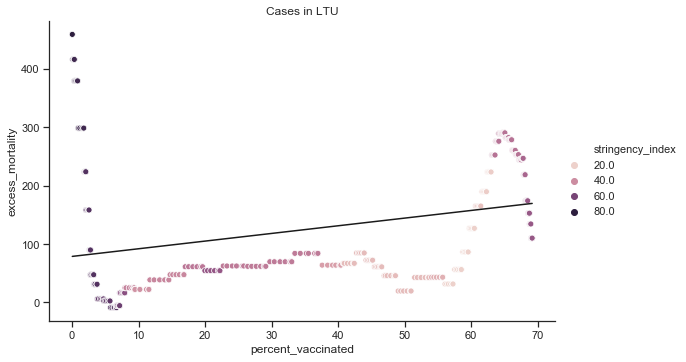

Score 0.0967269920498246


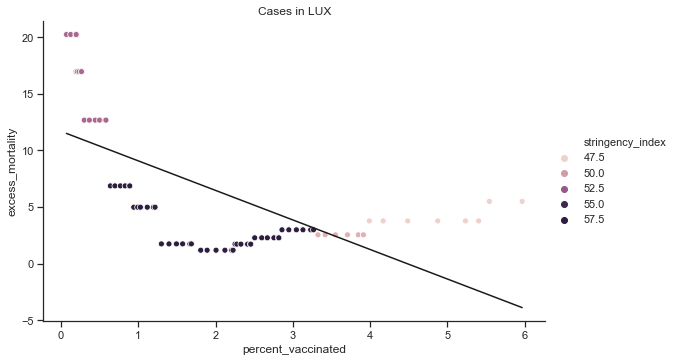

Score 0.4130767263141634


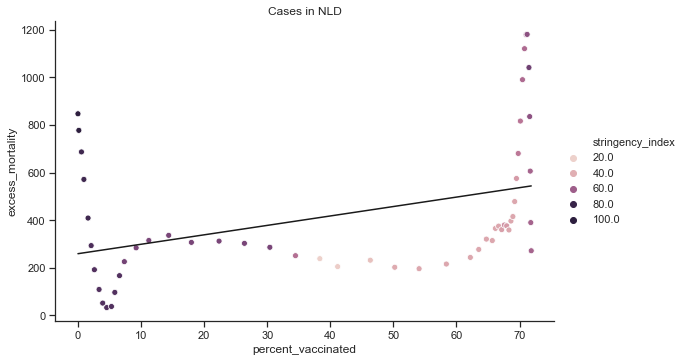

Score 0.15279106932638675


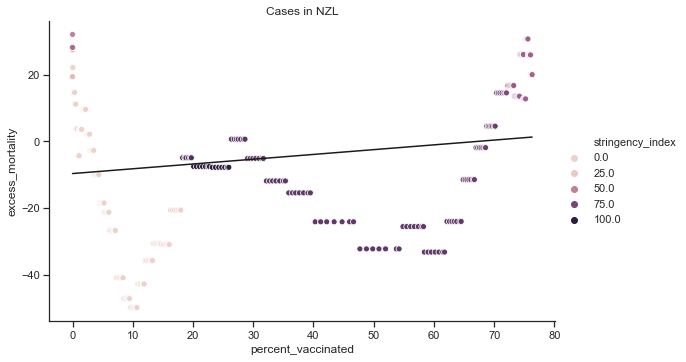

Score 0.03459803962969854


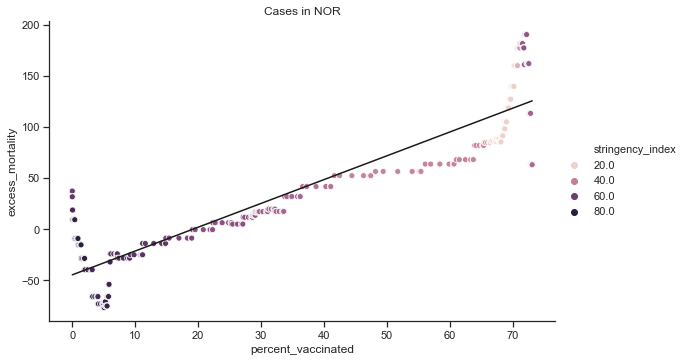

Score 0.8035611520073811


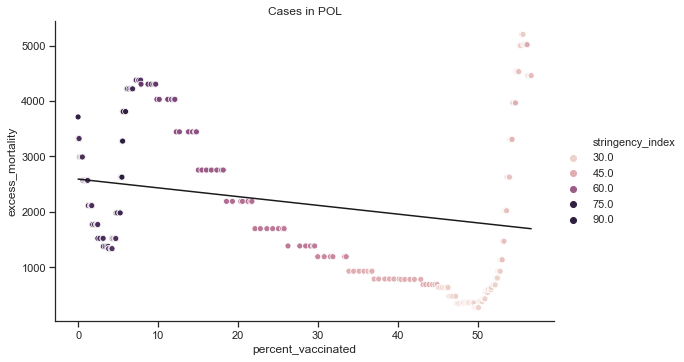

Score 0.0532299966836115


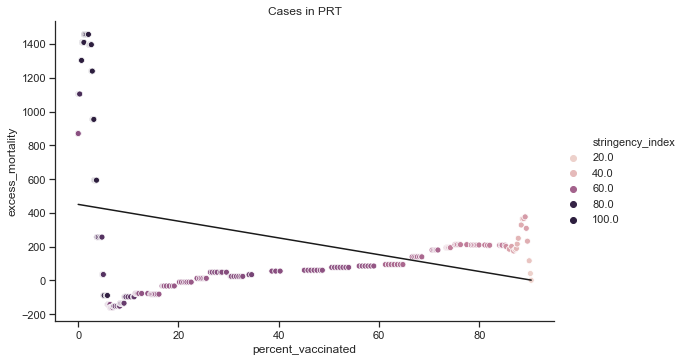

Score 0.0976239935055242


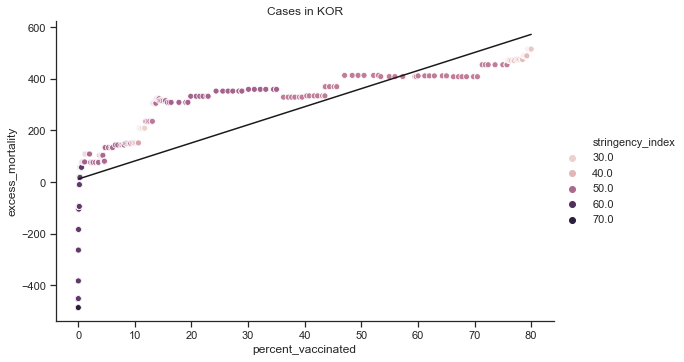

Score 0.6057341972883522


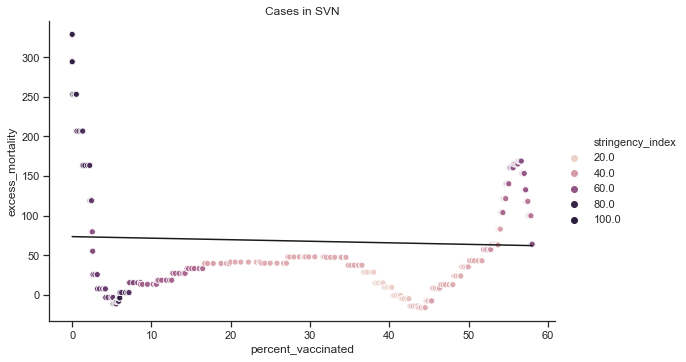

Score 0.0028815295250788076


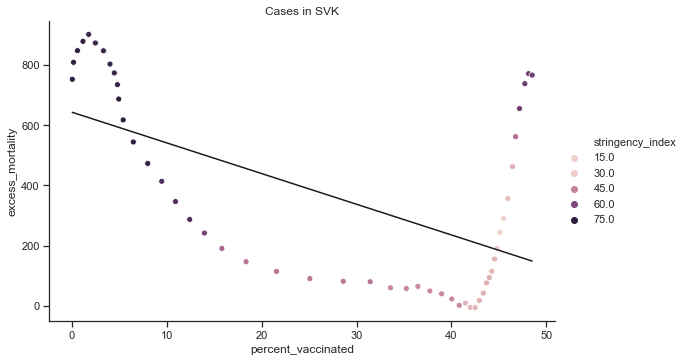

Score 0.3351947760873558


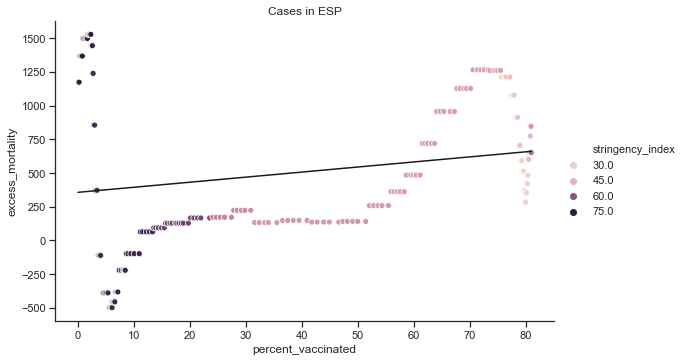

Score 0.04930230049562345


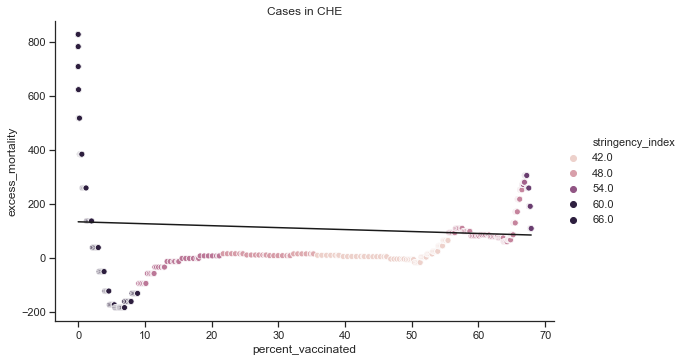

Score 0.007437187450867744


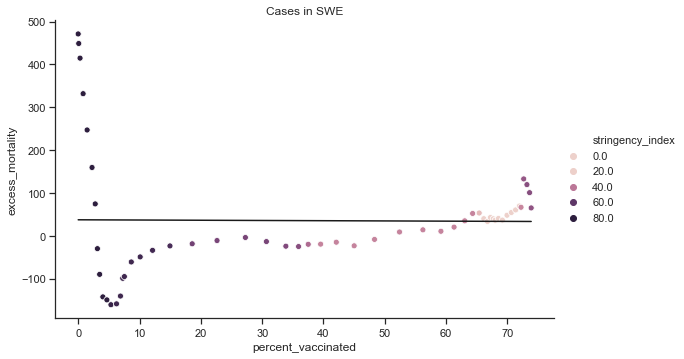

Score 0.00012509257911574867


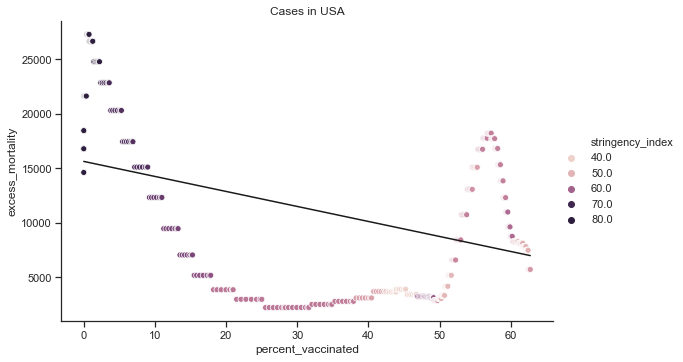

Score 0.17951823553396662
17 Positively Correlated: ['AUS', 'AUT', 'BEL', 'HRV', 'DNK', 'EST', 'FIN', 'DEU', 'GRC', 'ISL', 'LVA', 'LTU', 'NLD', 'NZL', 'NOR', 'KOR', 'ESP']
16 Negatively Correlated: ['BGR', 'CHL', 'CZE', 'GBR', 'FRA', 'HUN', 'ISR', 'ITA', 'LUX', 'POL', 'PRT', 'SVN', 'SVK', 'CHE', 'SWE', 'USA']


In [65]:
#regression on single countries
df = df.dropna(subset = ['excess_mortality'])
posCountry = []
negCountry = []
for c in valid_codes:
    dfUSA = df[df["country"] == c]
    testx = dfUSA[["percent_vaccinated"]]
    testy = dfUSA["excess_mortality"]

    reg.fit(testx, testy)
    
    y_pred = reg.predict(testx)
    seaborn.relplot(data=dfUSA, x='percent_vaccinated', y='excess_mortality', hue='stringency_index',  aspect=1.61)

    plt.plot(testx, y_pred, color ='k')
    plt.title("Cases in {}".format(c))
    plt.xlabel("percent_vaccinated")
    plt.ylabel("excess_mortality")

    plt.show()
    print("Score",reg.score(testx, testy))
    if reg.coef_ > 0:
        posCountry.append(c)
    else:
        negCountry.append(c)
        
print("{} Positively Correlated: {}".format(len(posCountry), posCountry))
print("{} Negatively Correlated: {}".format(len(negCountry), negCountry))

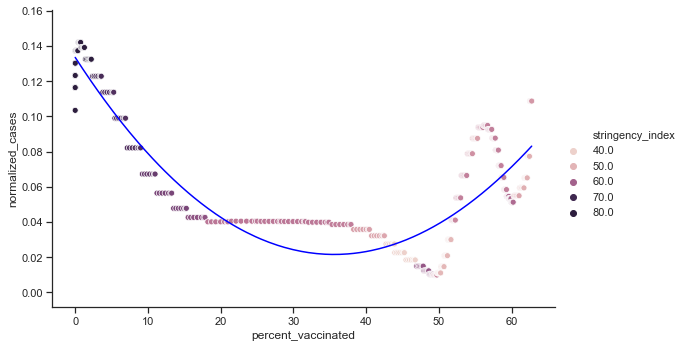

In [22]:
#polynomial regressionsfrom sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(testx)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, testy)

def viz_polymonial():
    seaborn.relplot(data=dfUSA, x='percent_vaccinated', y='normalized_cases', hue='stringency_index',  aspect=1.61)
    plt.plot(testx, pol_reg.predict(poly_reg.fit_transform(testx)), color='blue')
    plt.show()
    return
viz_polymonial()


coef=  [2.91932827e-06]
intercept=  0.060876672357179695


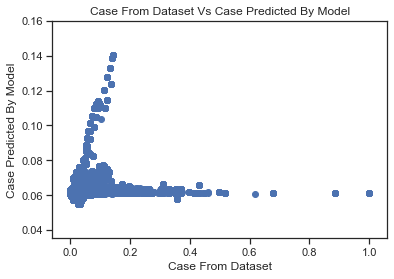

In [23]:
df = df.dropna(subset = ['excess_mortality'])
X = df[["excess_mortality"]]  # get input values


model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X,y)

coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

predictedCase = pd.DataFrame(model_ols.predict(X), columns=['Predicted Cases']) 
actualCase = pd.DataFrame(y, columns=['normalized_cases'])
actualCase = actualCase.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualCase,predictedCase],axis =1)
df_actual_vs_predicted.T

plt.scatter(y, model_ols.predict(X))
plt.xlabel('Case From Dataset')
plt.ylabel('Case Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Case From Dataset Vs Case Predicted By Model")
plt.show()

In [24]:
#other linear models, just for fun
model_r = linear_model.Ridge(normalize= True, alpha= 50)
model_r.fit(X,y)
print('coef= ' , model_r.coef_)
print('intercept= ' , model_r.intercept_)

model_l = linear_model.Lasso(normalize= True, alpha= 0.55)
model_l.fit(X,y)
print('coef= ' , model_l.coef_)
print('intercept= ' , model_l.intercept_)

coef=  [5.72417308e-08]
intercept=  0.06325919553566989
coef=  [0.]
intercept=  0.06330684599923969


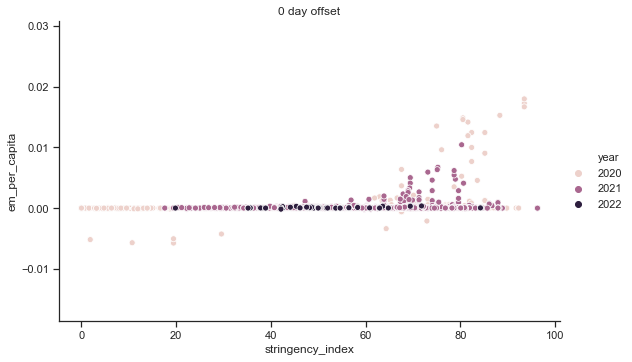

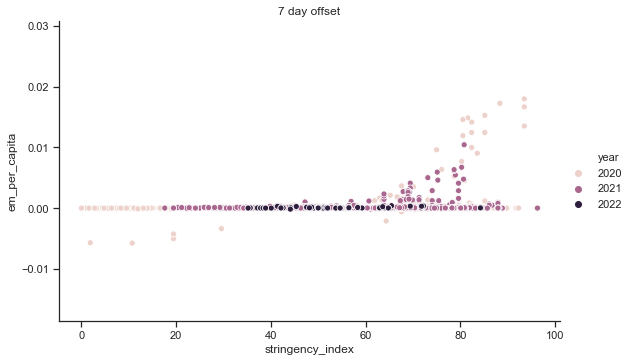

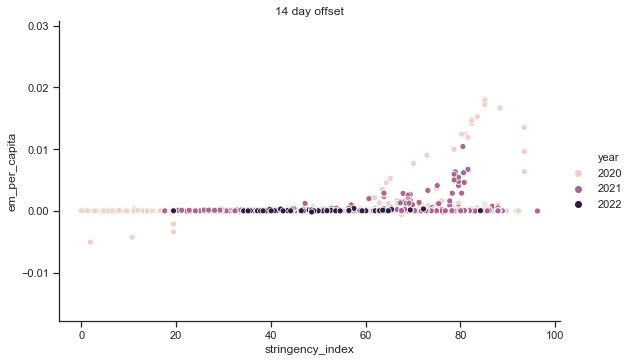

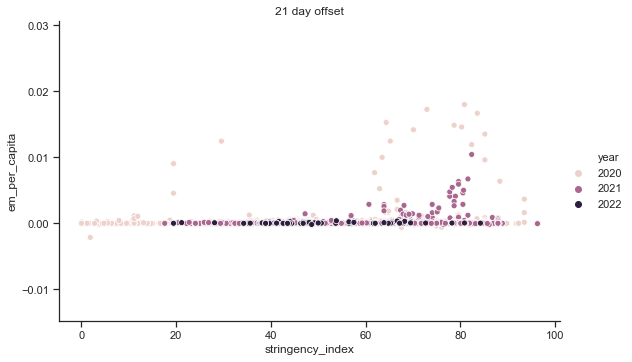

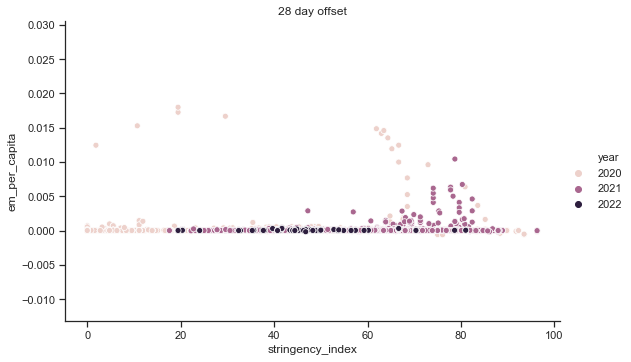

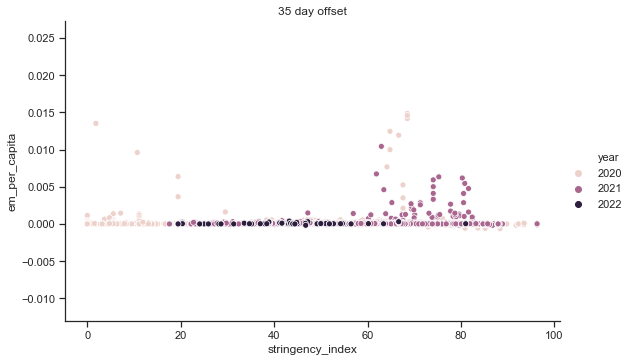

In [74]:
#delay in strigency invenstigation

import datetime
ex_mort = pd.read_csv("clean_combined.csv")
safety = pd.read_csv("covid-stringency-index.csv")
#only use countries that we have ex_mort data for
safety = safety[safety["Code"].isin(valid_codes)]
#only use weeks from the pandemic
ex_mort = ex_mort[ex_mort["years_relative"] >=0]

for i in range(6):
    d = datetime.timedelta(days=i*7)
    #convert to datetime to grab week number and year
    safety["Day"] =  pd.to_datetime(safety["Day"])+d

    safety["week"] = safety["Day"].dt.week
    safety['year'] = safety["Day"].dt.year
    si_df = safety.groupby(["Code", "week", "year"])["stringency_index"].mean().reset_index()
    si_df = si_df.rename(columns={"Code": "country"})
    si_df.head(10)

    df = pd.merge(ex_mort, si_df)
    seaborn.relplot(data=df, x='stringency_index', y='em_per_capita', hue='year', aspect=1.61).set(title = "{} day offset".format(i*7))
    plt.show()